# Lasso graphiques sur les données avec lamdas choisis linéairement

In [1]:
import matplotlib
%matplotlib nbagg
from matplotlib import pyplot

In [2]:
from statiskit import (linalg,
                       core,
                       pgm)


In [3]:
import math
import os

In [4]:
!jupyter nbconvert --ExecutePreprocessor.timeout=3600 --to notebook --execute sampling.ipynb --output sampling.

[NbConvertApp] Converting notebook sampling.ipynb to notebook
[NbConvertApp] Executing notebook with kernel: python2
[NbConvertApp] Writing 112928 bytes to sampling..ipynb


In [5]:
data = core.read_csv('data.csv')
data

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,$-0.11$,$-0.66$,$1.45$,$0.93$,$-1.91$,$-1.72$,$0.63$,$0.88$,$-0.04$,$-0.70$
1,$-0.16$,$-0.55$,$0.55$,$1.10$,$0.05$,$-0.94$,$-1.01$,$0.77$,$-1.14$,$-1.13$
2,$0.10$,$0.79$,$-1.00$,$-0.08$,$-0.01$,$0.53$,$0.82$,$1.16$,$0.49$,$0.50$
3,$-1.11$,$0.47$,$-0.11$,$0.18$,$-1.26$,$-0.07$,$0.18$,$0.29$,$-1.04$,$-0.29$
4,$-0.02$,$1.39$,$2.17$,$-0.00$,$0.31$,$-0.03$,$-0.67$,$0.88$,$-0.07$,$-0.01$
5,$-0.11$,$2.49$,$-0.47$,$-0.45$,$0.72$,$0.62$,$0.49$,$0.84$,$0.79$,$0.49$
6,$-0.29$,$0.51$,$-1.94$,$-0.22$,$0.13$,$-0.43$,$-1.26$,$1.32$,$0.44$,$0.41$
7,$-0.42$,$1.03$,$-0.57$,$-0.90$,$-0.50$,$0.68$,$-0.18$,$-0.18$,$0.58$,$0.64$
8,$-0.72$,$0.88$,$-1.77$,$0.62$,$-1.66$,$0.14$,$-0.46$,$-0.08$,$-1.20$,$-1.01$
9,$0.57$,$-0.06$,$0.73$,$1.12$,$0.26$,$-0.84$,$-0.00$,$1.34$,$0.94$,$0.31$


In [6]:
!Rscript lasso.R


In [7]:
graphs = []
for filepath in os.listdir('.'):
    if filepath.startswith('lassolin_'):
        adjmat = linalg.read_csv(filepath)
        graphs.append(pgm.UndirectedGraph(adjmat))
graphs = sorted(graphs, key = lambda graph: graph.nb_edges)

<IPython.core.display.Javascript object>


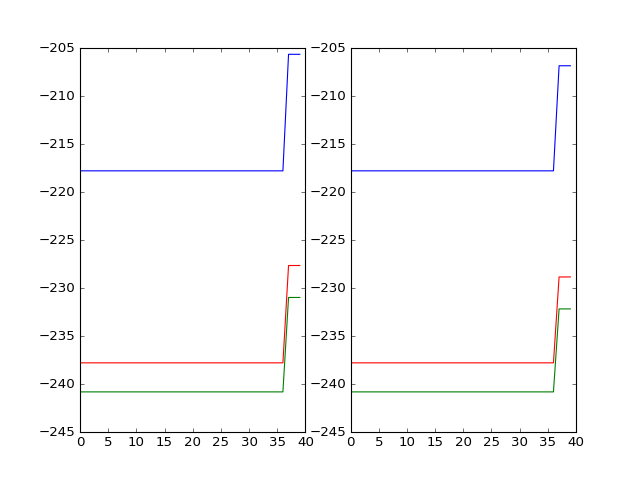

In [21]:
LLHs = []
BICs = []
AICs = []

for graph in graphs:
    try:
        
        mle = pgm.graphical_gaussian_estimation(algo='scd',
                                                data=data,
                                                graph=graph)
        
        nre = pgm.graphical_gaussian_estimation(algo='nr',
                                                data=data,
                                                graph=graph)

        dist = mle.estimated.copy()
    
        LLHs.append(2 * dist.loglikelihood(data))
    except:
        LLHs.append(float("nan"))
    finally:
        
        BICs.append(LLHs[-1] - dist.nb_parameters * math.log(len(data.events)))
        
        AICs.append(LLHs_ML[-1] - dist.nb_parameters * 2)
        AICs1.append(LLHs_NR[-1] - dist.nb_parameters * 2)


fig = pyplot.figure()
axes = fig.add_subplot(121)
axes.plot(LLHs_ML)
axes.plot(BICs)
axes.plot(AICs)
axes = fig.add_subplot(122)
axes.plot(LLHs_NR)
axes.plot(BICs1)
axes.plot(AICs1)

In [9]:
#eff

In [11]:
graph0 = pgm.read_gml('graph.gml')
#graph0.to_matrix()

In [12]:
aic = AICs.index(max(AICs))
bic = BICs.index(max(BICs))
#print(min(eff))
#print(max(eff))
eff[aic]

-0.005799889094438521

<IPython.core.display.Javascript object>


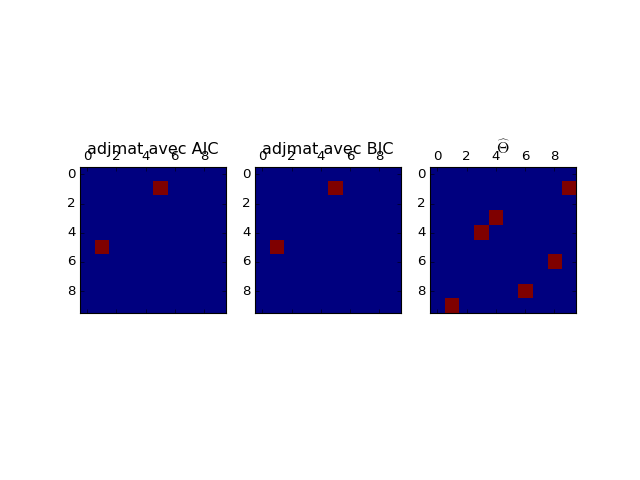

In [13]:
fig = pyplot.figure()
axes = graphs[aic].to_matrix().plot(axes = fig.add_subplot(131))
axes.set_title('adjmat avec AIC')
axes = graphs[bic].to_matrix().plot(axes = fig.add_subplot(132))
axes.set_title('adjmat avec BIC')
axes =  graph0.to_matrix().plot(axes = fig.add_subplot(133))
axes.set_title('$ \widehat \Theta$')

In [23]:
aic1 = AICs1.index(max(AICs1))
bic1 = BICs1.index(max(BICs1))
#eff[aic1]

<IPython.core.display.Javascript object>


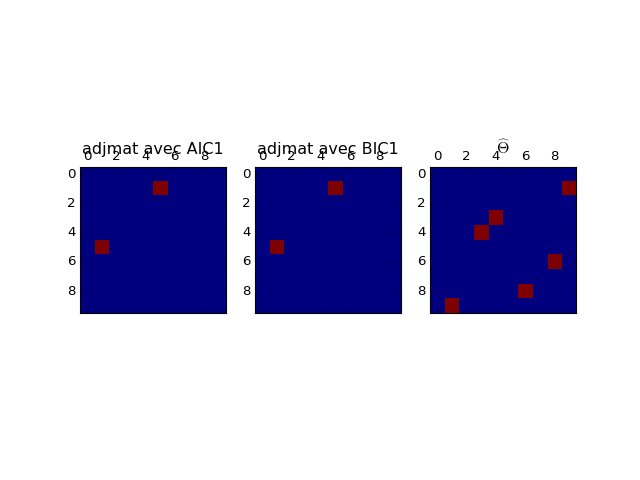

In [15]:
fig = pyplot.figure()
axes = graphs[aic1].to_matrix().plot(axes = fig.add_subplot(131))
axes.set_title('adjmat avec AIC1')
axes = graphs[bic1].to_matrix().plot(axes = fig.add_subplot(132))
axes.set_title('adjmat avec BIC1')
axes =  graph0.to_matrix().plot(axes = fig.add_subplot(133))
axes.set_title('$ \widehat \Theta$')

In [16]:
#d = len(data.events)
#all_pos =  graph0.nb_edges
#all_neg = d * (d - 1)/2 - all_pos
#all_neg


In [17]:
#tp = []
#fp = []
#for graph in graphs:
   # a = graph.to_matrix()
#    for u in range(d):
 #       for v in  range(d):
  #          b[u,v] =  (paths[u,v]== 0) * (a[u,v]==0) 
   # 
   # tp.append(b)
#tp    

In [18]:
#tp = []
#a = graphs[1].to_matrix()
#for u in range(d):
 #   for v in  range(d):
  #      tp.append( (paths[u,v]== 0) * (a[u,v]==0) )
   #     fp.append( (paths[u,v]!= 0) * (a[u,v]==0) )
#sum(tp)


In [19]:
#b = linalg.Matrix([[ 0 for j in range(10)] for i in range(10)])
#a = graphs[1].to_matrix()
####for u in range(d):
   ### for v in  range(d):
     ##   b[u,v]= (paths[u,v]== 0) * (a[u,v]==0) 
        
#sum((b != 0 )+0)